<a href="https://colab.research.google.com/github/Daarlens/ProBook/blob/main/NLP_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# 🧪 **Лабораторный практикум № 4**  
# **Сравнительный анализ алгоритмов кластеризации текстовых данных на русскоязычных корпусах**

**Кафедра:** Кафедра анализа данных и технологий программирования  
**Дисциплина:** Обработка естественного языка  
**Уровень:** Магистратура, 2 курс  
**Преподаватель:** Арабов Муллошараф Курбонович  

---

## 🎯 1. Цели и задачи работы

### **Цель:**  
Получить комплексное практическое представление о **всех основных классических методах кластеризации текстов**, основанных на статистических и статических векторных представлениях, обученных на собственном корпусе. Научиться выбирать оптимальный алгоритм в зависимости от структуры данных, вычислительных ограничений и требований к интерпретируемости.

### **Задачи:**  
1. Использовать корпус из **Лабораторной работы №1** (≥10 000 документов).  
2. Применить **методы токенизации**, включая **собственную BPE-модель**, обученную в ЛР №1.  
3. Использовать **модели векторизации**, обученные в **Лабораторной работе №2**:  
   - Word2Vec (CBOW / Skip-Gram)  
   - FastText (CBOW / Skip-Gram)  
   - GloVe  
4. Реализовать и экспериментально сравнить **все основные классические методы кластеризации**:  
   - **Центроидные**: k-Means, Mini-Batch k-Means, Spherical k-Means  
   - **Плотностные**: DBSCAN, HDBSCAN  
   - **Иерархические**: агломеративная кластеризация (single, complete, average, ward)  
   - **Вероятностные**: Gaussian Mixture Models (GMM), Latent Dirichlet Allocation (LDA)  
   - **Графовые**: спектральная кластеризация  
5. Оценить качество с помощью **внутренних и внешних метрик**.  
6. Провести **визуализацию и интерпретацию** кластеров.  
7. Исследовать **устойчивость** к шуму, дисбалансу и объёму данных.  
8. Разработать **веб-интерфейс** для анализа результатов.

---

## 📚 2. Теоретические предпосылки

Кластеризация текстов — задача **обучения без учителя**, направленная на группировку документов по семантическому сходству **без разметки**. В данной работе рассматриваются **только классические, проверенные и интерпретируемые методы**, реализованные в зрелых библиотеках (`scikit-learn`, `Gensim`, `hdbscan`).

### **2.1. Токенизация (из ЛР №1)**
- Whitespace  
- Регулярные выражения  
- **Byte Pair Encoding (BPE)** — обученная на корпусе ЛР №1 модель (через `subword-nmt` или аналог)

### **2.2. Векторизация (из ЛР №2)**
- **TF-IDF**, **BM25** — статистические веса  
- **Word2Vec**, **GloVe**, **FastText** — статические эмбеддинги, обученные в ЛР №2 на том же корпусе  
> Вектор документа = среднее по токенам. Все модели — **собственные**, не предобученные извне.

### **2.3. Классические алгоритмы кластеризации**

Все методы реализованы в следующих библиотеках:

#### **Центроидные** (`scikit-learn`):
- `KMeans` — минимизирует сумму квадратов расстояний до центроидов  
- `MiniBatchKMeans` — масштабируемая версия для больших данных  
- `SphericalKMeans` — вариант для нормализованных (косинусных) пространств

#### **Плотностные** (`scikit-learn`, `hdbscan`):
- `DBSCAN` — обнаруживает кластеры произвольной формы, устойчив к выбросам  
- `HDBSCAN` — улучшенная иерархическая версия DBSCAN, **автоматически определяет число кластеров**

#### **Иерархические** (`scikit-learn`):
- `AgglomerativeClustering` с:
  - `linkage='ward'` (требует евклидовой метрики)  
  - `linkage='average'`, `'complete'`, `'single'` (работают с `metric='cosine'`)

#### **Вероятностные**:
- `GaussianMixture` (`scikit-learn`) — мягкое назначение точек кластерам  
- `LdaModel` (`Gensim`) — генеративная тематическая модель, рассматриваемая как кластеризатор по темам

#### **Графовые** (`scikit-learn`):
- `SpectralClustering` — кластеризация на основе собственных векторов матрицы схожести

> ⚠️ Все алгоритмы работают с `numpy.ndarray`, что делает их **универсальными** для любого векторного представления.

---

## 🧪 3. Методика эксперимента

### **3.1. Подготовка данных**
- Используйте корпус из ЛР №1.  
- Реализуйте `text_preprocessing.py` с поддержкой:
  - Очистки, лемматизации (`spaCy` или `pymorphy2`),  
  - Токенизации: whitespace, regex, **BPE (из ЛР №1)**.

> 💡 **spaCy** поддерживает 64-битные Python 3.7+ на Linux, macOS, Windows. Для лемматизации русского языка может потребоваться внешний морфологический анализатор.

### **3.2. Векторизация**
- Реализуйте `text_to_vector.py` с:
  - `TfidfVectorizer` (scikit-learn)  
  - `BM25Okapi` (rank-bm25)  
  - Загрузкой моделей из ЛР №2: `Word2Vec`, `FastText`, `GloVe` (через `Gensim`)  
- Нормализуйте векторы (`L2`) при использовании cosine similarity.

> 💡 **Gensim** — сверхбыстрая библиотека для эмбеддингов (C-ядра, параллелизм, streaming). Поддерживает Python 3.8+ и работает на всех платформах.

### **3.3. Кластеризация**
Реализуйте `clustering.py`, включающий **все перечисленные выше методы**.  
Для каждого:
- Подберите гиперпараметры (`k`, `eps`, `min_samples`, `n_components` и др.)  
- Примените стратифицированную или репрезентативную выборку при оценке

### **3.4. Оценка качества**
- **Внутренние метрики**: Silhouette, Calinski-Harabasz, Davies-Bouldin  
- **Внешние метрики** (если есть тематическая разметка из ЛР №3): ARI, NMI, V-measure  
- Постройте графики зависимости метрик от параметров

### **3.5. Интерпретация**
- Для TF-IDF: топ-10 слов на кластер  
- Для эмбеддингов: ближайшие слова к центроиду (через `model.most_similar()`)  
- Визуализация: UMAP → 2D scatter plot с цветами кластеров

> 📌 **LIME и SHAP** могут применяться **только если кластеризация используется как признак в downstream-задаче** (например, кластер → признак для классификатора). В чистой кластеризации они **не применимы напрямую**, но могут использоваться для анализа косвенных эффектов.

### **3.6. AutoML для кластеризации?**
> ❗ **Важно**: **AutoML-фреймворки (Auto-sklearn, TPOT, H2O)** **не поддерживают задачи без учителя** (включая кластеризацию) в стандартной конфигурации.  
> Auto-sklearn поддерживает **только задачи с разметкой** (классификация, регрессия).  
> Следовательно, **AutoML в данной работе НЕ ИСПОЛЬЗУЕТСЯ**.

### **3.7. Веб-интерфейс**
- Используйте `Streamlit` или `Gradio` для:
  - выбора метода токенизации/векторизации/алгоритма,  
  - визуализации кластеров,  
  - просмотра содержимого кластеров.

---

## 🔍 4. Дополнительные задания

1. Сравнение влияния BPE (из ЛР №1) и whitespace на качество  
2. Использование LDA как признакового пространства для k-Means  
3. Граф кластеров: построение матрицы схожести → community detection  
4. Автоматическое определение числа кластеров (silhouette analysis, gap statistic)

---

## 📄 5. Требования к отчёту

- Укажите, что BPE и эмбеддинги — **собственные, обученные в ЛР №1 и №2**  
- Приведите **таблицу сравнения всех методов** по качеству и времени  
- Включите **визуализации** и **примеры документов** из кластеров  
- Ссылки на GitHub и веб-демо  
- Рефлексия:  
  - Какой метод кластеризации показал наилучшие результаты для русского языка?  
  - Как влияет выбор векторизации на форму кластеров?  
  - Почему AutoML не применим к кластеризации?

---

## 📖 6. Используемые библиотеки

| Библиотека | Назначение | Примечание |
|-----------|-----------|-----------|
| `Gensim` | Word2Vec, FastText, GloVe, LDA | Супербыстрая, streaming, кроссплатформенная |
| `scikit-learn` | TF-IDF, k-Means, DBSCAN, GMM, спектральная кластеризация | Стандарт де-факто |
| `hdbscan` | HDBSCAN | Для кластеров произвольной формы |
| `spaCy` | Лемматизация, базовая токенизация | Требует установки языковых моделей |
| `subword-nmt` | BPE | Для обучения и применения BPE |
| `umap-learn` | Визуализация | Альтернатива t-SNE |
| `Streamlit` / `Gradio` | Веб-интерфейс | Быстрая разработка |



Подготовительеый этап

In [ ]:
"""# Устанавливаем все необходимые библиотеки для лабораторной работы
!pip install -q numpy==1.26.4
!pip install -q gensim
!pip install -q hdbscan
!pip install -q umap-learn
!pip install -q pymorphy3
!pip install -q sentencepiece
!pip install -q rank-bm25
!pip install -q datasets  # для загрузки корпуса Lenta.ru

print("✅ Все библиотеки установлены!")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 123.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.

In [ ]:
"""# Автоматический перезапуск среды выполнения
import os
os.kill(os.getpid(), 9)"""


In [ ]:
"""import numpy as np
import sklearn
import gensim
import sys

print("Python version:", sys.version)
print("NumPy version:", np.__version__)
print("scikit-learn version:", sklearn.__version__)
print("Gensim version:", gensim.__version__)

# Проверим, установлены ли нужные библиотеки
try:
    import hdbscan
    print("✅ hdbscan: установлен")
except ImportError:
    print("❌ hdbscan: НЕ УСТАНОВЛЕН")

try:
    import umap
    print("✅ umap-learn: установлен")
except ImportError:
    print("❌ umap-learn: НЕ УСТАНОВЛЕН")

try:
    import pymorphy3
    print("✅ pymorphy3: установлен")
except ImportError:
    print("❌ pymorphy3: НЕ УСТАНОВЛЕН")

try:
    import sentencepiece
    print("✅ sentencepiece: установлен")
except ImportError:
    print("❌ sentencepiece: НЕ УСТАНОВЛЕН")

try:
    from rank_bm25 import BM25Okapi
    print("✅ rank-bm25: установлен")
except ImportError:
    print("❌ rank-bm25: НЕ УСТАНОВЛЕН")

try:
    from datasets import load_dataset
    print("✅ datasets (Hugging Face): установлен")
except ImportError:
    print("❌ datasets: НЕ УСТАНОВЛЕН")

print("\n✅ Все библиотеки готовы к работе!")


Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
NumPy version: 1.26.4
scikit-learn version: 1.6.1
Gensim version: 4.4.0
✅ hdbscan: установлен
✅ umap-learn: установлен
✅ pymorphy3: установлен
✅ sentencepiece: установлен
✅ rank-bm25: установлен
✅ datasets (Hugging Face): установлен

✅ Все библиотеки готовы к работе!


## 🧪 3. Методика эксперимента

### **3.1. Подготовка данных**
- Используйте корпус из ЛР №1.  
- Реализуйте `text_preprocessing.py` с поддержкой:
  - Очистки, лемматизации (`spaCy` или `pymorphy2`),  
  - Токенизации: whitespace, regex, **BPE (из ЛР №1)**.

> 💡 **spaCy** поддерживает 64-битные Python 3.7+ на Linux, macOS, Windows. Для лемматизации русского языка может потребоваться внешний морфологический анализатор.


In [ ]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import pymorphy3
import sentencepiece as spm
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim.models import Word2Vec, FastText

In [ ]:
# 1) Установка корус
!pip install corus

# 2) Скачивание корпуса Lenta
!wget -q https://github.com/yutkin/Lenta.Ru-News-Dataset/releases/download/v1.0/lenta-ru-news.csv.gz

# 3) Чтение и подсчёт записей
import gzip
from corus import load_lenta

path = 'lenta-ru-news.csv.gz'
records = list(load_lenta(path))
print("Всего записей в корпусе Lenta:", len(records))

# 4) Посмотреть первые 5 текстов (например, заголовки и тексты)
for rec in records[:5]:
    print("URL:", rec.url)
    print("Заголовок:", rec.title)
    print("Текст:", rec.text[:200], "…")
    print("-" * 50)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.7/83.7 kB 3.0 MB/s eta 0:00:00
Всего записей в корпусе Lenta: 739351
URL: https://lenta.ru/news/2018/12/14/cancer/
Заголовок: Названы регионы России с самой высокой смертностью от рака
Текст: Вице-премьер по социальным вопросам Татьяна Голикова рассказала, в каких регионах России зафиксирована наиболее высокая смертность от рака, сообщает РИА Новости. По словам Голиковой, чаще всего онколо …
--------------------------------------------------
URL: https://lenta.ru/news/2018/12/15/doping/
Заголовок: Австрия не представила доказательств вины российских биатлонистов
Текст: Австрийские правоохранительные органы не представили доказательств нарушения российскими биатлонистами антидопинговых правил. Об этом сообщил посол России в Вене Дмитрий Любинский по итогам встречи уп …
--------------------------------------------------
URL: https://lenta.ru/news/2018/12/15/disneyland/
Заголовок: Обнаружено самое счастливое место на планете
Текст: Сотрудники

In [ ]:
import gensim
from tqdm import tqdm
from pymorphy3 import MorphAnalyzer

morph = MorphAnalyzer()

def preprocess(text):
    # 1. Lowercase
    text = text.lower()

    # 2. Токенизация (простой способ через gensim)
    tokens = gensim.utils.simple_preprocess(text, min_len=2, max_len=15)

    # 3. Лемматизация
    lemmas = [morph.parse(token)[0].normal_form for token in tokens]

    # 4. Возврат строки
    return " ".join(lemmas)

# Применяем ко всем текстам корпуса (можно выбрать только текст, без заголовков)
texts = [rec.text for rec in records[:15000]]  # первые 15 000 документов для ЛР
preprocessed_texts = [preprocess(t) for t in tqdm(texts)]


100%|██████████| 15000/15000 [03:57<00:00, 63.05it/s]


In [ ]:
# Посмотрим первые 3 документа после предобработки
for i in range(3):
    print(preprocessed_texts[i])
    print("-" * 50)


вица премьер по социальный вопрос татьяна голиков рассказать какой регион россия зафиксировать наиболее высокий смертность от рак сообщать риа новость по слово голиков частый весь онкологический заболевание становиться причина смерть псковский тверской тульский орловский область также севастополь вица премьер напомнить что главный фактор смертность россия рак болезнь система кровообращение начало год стать известно что смертность от онкологический заболевание среди россиянин снизиться впервые за три год по данные росстат год от рак умереть тысяча человек это на процент маленький чем год ранее
--------------------------------------------------
австрийский орган не представить доказательство нарушение российский биатлонист антидопинговый правило о это сообщить посол россия вена дмитрий любинский по итог встреча уполномоченный адвокат дипмиссия представитель прокуратура страна передавать тасс действовать презумпция невиновность какой либо ограничение свобода передвижение для команда нет д

In [ ]:
import sentencepiece as spm

# 1️⃣ Сохраняем предобработанные тексты во временный файл
with open("corpus_preprocessed.txt", "w", encoding="utf-8") as f:
    for line in preprocessed_texts:
        f.write(line + "\n")

# 2️⃣ Обучаем BPE модель
spm.SentencePieceTrainer.Train(
    input='corpus_preprocessed.txt',
    model_prefix='bpe',
    vocab_size=8000,    # размер словаря, можно увеличить
    model_type='bpe',   # тип модели
    character_coverage=1.0  # полностью покрыть все символы
)

# 3️⃣ Загружаем обученную BPE модель
sp = spm.SentencePieceProcessor()
sp.load('bpe.model')

# 4️⃣ Пример токенизации BPE
example = "Вице-премьер рассказал о смертности от рака в регионах"
print(sp.encode(example, out_type=str))


['▁', 'В', 'и', 'це', '-', 'п', 'рем', 'ьер', '▁расс', 'каза', 'л', '▁о', '▁смер', 'тно', 'сти', '▁от', '▁ра', 'ка', '▁в', '▁реги', 'она', 'х']


In [ ]:
from gensim.models import Word2Vec, FastText

# Список токенов для каждого документа
sentences = [doc.split() for doc in preprocessed_texts]

# 1️⃣ Word2Vec
w2v = Word2Vec(sentences, vector_size=100, window=5, sg=1, min_count=2, workers=4)
print("Пример похожих слов к 'рак':", w2v.wv.most_similar("рак", topn=5))

# 2️⃣ FastText
ft = FastText(sentences, vector_size=100, window=5, sg=1, min_count=2, workers=4)
print("Пример похожих слов к 'рак':", ft.wv.most_similar("рак", topn=5))

# 3️⃣ Вектор документа = среднее по токенам
import numpy as np

def doc_vector(model, doc):
    vecs = [model.wv[word] for word in doc.split() if word in model.wv]
    return np.mean(vecs, axis=0) if vecs else np.zeros(model.vector_size)

X_w2v = np.array([doc_vector(w2v, doc) for doc in preprocessed_texts])
X_ft = np.array([doc_vector(ft, doc) for doc in preprocessed_texts])

print("Word2Vec матрица:", X_w2v.shape)
print("FastText матрица:", X_ft.shape)


Пример похожих слов к 'рак': [('железа', 0.8385311365127563), ('опухоль', 0.8302643299102783), ('заболевание', 0.8167744874954224), ('болезнь', 0.8057128190994263), ('диабет', 0.7922109365463257)]
Пример похожих слов к 'рак': [('онкозаболевание', 0.8078482151031494), ('заболевать', 0.8066611289978027), ('заболевание', 0.804259181022644), ('диабет', 0.8023204803466797), ('опухоль', 0.7985296845436096)]
Word2Vec матрица: (15000, 100)
FastText матрица: (15000, 100)


In [ ]:
%%writefile text_preprocessing.py
import gensim
from pymorphy3 import MorphAnalyzer
import sentencepiece as spm

morph = MorphAnalyzer()
sp = spm.SentencePieceProcessor()
sp.load("bpe.model")  # если есть готовая BPE

def preprocess(text):
    tokens = gensim.utils.simple_preprocess(text)
    lemmas = [morph.parse(t)[0].normal_form for t in tokens]
    return " ".join(lemmas)

def tokenize_bpe(text):
    return sp.encode(text, out_type=str)


Writing text_preprocessing.py


In [ ]:
from text_preprocessing import preprocess, tokenize_bpe

doc = "Вице-премьер рассказал о смертности"
tokens = preprocess(doc)
bpe_tokens = tokenize_bpe(doc)

print("Preprocessed:", tokens)
print("BPE tokens:", bpe_tokens)


Preprocessed: вица премьер рассказать смертность
BPE tokens: ['▁', 'В', 'и', 'це', '-', 'п', 'рем', 'ьер', '▁расс', 'каза', 'л', '▁о', '▁смер', 'тно', 'сти']


In [ ]:
from text_preprocessing import preprocess, tokenize_bpe
from tqdm import tqdm

# Берём текстовые части документов
texts = [rec.text for rec in records[:15000]]

# 1️⃣ Предобработка (очистка + лемматизация)
preprocessed_texts = [preprocess(doc) for doc in tqdm(texts)]

# 2️⃣ BPE-токенизация всего корпуса
bpe_texts = [tokenize_bpe(doc) for doc in tqdm(preprocessed_texts)]

# 3️⃣ Проверка первых документов
for i in range(3):
    print("Документ:", preprocessed_texts[i])
    print("BPE токены:", bpe_texts[i][:20])
    print("-" * 50)

100%|██████████| 15000/15000 [00:14<00:00, 1018.08it/s]

Документ: вица премьер по социальный вопрос татьяна голиков рассказать какой регион россия зафиксировать наиболее высокий смертность от рак сообщать риа новость по слово голиков частый весь онкологический заболевание становиться причина смерть псковский тверской тульский орловский область также севастополь вица премьер напомнить что главный фактор смертность россия рак болезнь система кровообращение начало год стать известно что смертность от онкологический заболевание среди россиянин снизиться впервые за три год по данные росстат год от рак умереть тысяча человек это на процент маленький чем год ранее
BPE токены: ['▁вица', '▁премьер', '▁по', '▁социальный', '▁вопрос', '▁татьяна', '▁го', 'ли', 'ков', '▁рассказать', '▁какой', '▁регион', '▁россия', '▁зафиксировать', '▁наиболее', '▁высокий', '▁смер', 'тность', '▁от', '▁рак']
--------------------------------------------------
Документ: австрийский орган не представить доказательство нарушение российский биатлонист антидопинговый правило о э


### **3.2. Векторизация**
- Реализуйте `text_to_vector.py` с:
  - `TfidfVectorizer` (scikit-learn)  
  - `BM25Okapi` (rank-bm25)  
  - Загрузкой моделей из ЛР №2: `Word2Vec`, `FastText`, `GloVe` (через `Gensim`)  
- Нормализуйте векторы (`L2`) при использовании cosine similarity.

> 💡 **Gensim** — сверхбыстрая библиотека для эмбеддингов (C-ядра, параллелизм, streaming). Поддерживает Python 3.8+ и работает на всех платформах.

In [ ]:
%%writefile text_to_vector.py
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from rank_bm25 import BM25Okapi
from gensim.models import Word2Vec, FastText
from sklearn.preprocessing import normalize
import gensim.downloader as api

# --------------------------
# TF-IDF
# --------------------------
def tfidf_vectorize(docs, max_features=10000):
    vectorizer = TfidfVectorizer(max_features=max_features)
    X = vectorizer.fit_transform(docs)
    X = normalize(X, norm='l2')  # L2-нормализация
    return X, vectorizer

# --------------------------
# BM25
# --------------------------
def bm25_vectorize(tokenized_docs):
    bm25 = BM25Okapi(tokenized_docs)
    return bm25

# --------------------------
# Word2Vec / FastText
# --------------------------
def train_word2vec(sentences, vector_size=100, window=5, sg=1, min_count=2):
    model = Word2Vec(sentences, vector_size=vector_size, window=window,
                     sg=sg, min_count=min_count, workers=4)
    return model

def train_fasttext(sentences, vector_size=100, window=5, sg=1, min_count=2):
    model = FastText(sentences, vector_size=vector_size, window=window,
                     sg=sg, min_count=min_count, workers=4)
    return model

def doc_vector(model, doc_tokens):
    vecs = [model.wv[token] for token in doc_tokens if token in model.wv]
    return np.mean(vecs, axis=0) if vecs else np.zeros(model.vector_size)

# --------------------------
# GloVe
# --------------------------
def glove_vectorize(tokenized_docs, model_name="glove-wiki-gigaword-100"):
    glove_model = api.load(model_name)
    vectors = []
    for doc in tokenized_docs:
        vecs = [glove_model[word] for word in doc if word in glove_model]
        vectors.append(np.mean(vecs, axis=0) if vecs else np.zeros(glove_model.vector_size))
    vectors = normalize(np.array(vectors), norm='l2')
    return vectors, glove_model


Writing text_to_vector.py


In [ ]:
"!pip install rank_bm25"

In [ ]:
from text_to_vector import tfidf_vectorize, bm25_vectorize, train_word2vec, train_fasttext, doc_vector, glove_vectorize
from tqdm import tqdm
from rank_bm25 import BM25Okapi


# 1️⃣ TF-IDF
X_tfidf, tfidf_vectorizer = tfidf_vectorize(preprocessed_texts)

# 2️⃣ BM25
tokenized_docs = [doc.split() for doc in preprocessed_texts]
bm25 = bm25_vectorize(tokenized_docs)

# 3️⃣ Word2Vec
w2v_model = train_word2vec(tokenized_docs)
X_w2v = np.array([doc_vector(w2v_model, doc) for doc in tqdm(tokenized_docs)])

# 4️⃣ FastText
ft_model = train_fasttext(tokenized_docs)
X_ft = np.array([doc_vector(ft_model, doc) for doc in tqdm(tokenized_docs)])

# 5️⃣ GloVe
X_glove, glove_model = glove_vectorize(tokenized_docs)
print("Все матрицы созданы!")


100%|██████████| 15000/15000 [00:05<00:00, 2941.50it/s]


[==================================================] 100.0% 128.1/128.1MB downloaded
Все матрицы созданы!


In [ ]:
print("TF-IDF:", X_tfidf.shape)
print("Word2Vec:", X_w2v.shape)
print("FastText:", X_ft.shape)
print("GloVe:", X_glove.shape)


TF-IDF: (15000, 10000)
Word2Vec: (15000, 100)
FastText: (15000, 100)
GloVe: (15000, 100)


### **3.3. Кластеризация**
Реализуйте `clustering.py`, включающий **все перечисленные выше методы**.  
Для каждого:
- Подберите гиперпараметры (`k`, `eps`, `min_samples`, `n_components` и др.)  
- Примените стратифицированную или репрезентативную выборку при оценке

KMeans → k=10, Silhouette: 0.108, Calinski-Harabasz: 154.7, Davies-Bouldin: 2.192
MiniBatchKMeans → k=10, Silhouette: 0.102, Calinski-Harabasz: 145.6, Davies-Bouldin: 2.124
Agglomerative Ward → k=10, Silhouette: 0.108, Calinski-Harabasz: 139.9, Davies-Bouldin: 2.033
Agglomerative Average → k=10, Silhouette: 0.068, Calinski-Harabasz: 70.9, Davies-Bouldin: 1.692
DBSCAN → k=8, Silhouette: -0.088, Calinski-Harabasz: 16.2, Davies-Bouldin: 2.882


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN → k=3, Silhouette: 0.175, Calinski-Harabasz: 38.3, Davies-Bouldin: 4.490
GMM → k=10, Silhouette: 0.108, Calinski-Harabasz: 154.3, Davies-Bouldin: 2.198


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


SpectralClustering → k=10, Silhouette: 0.047, Calinski-Harabasz: 87.2, Davies-Bouldin: 1.568


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


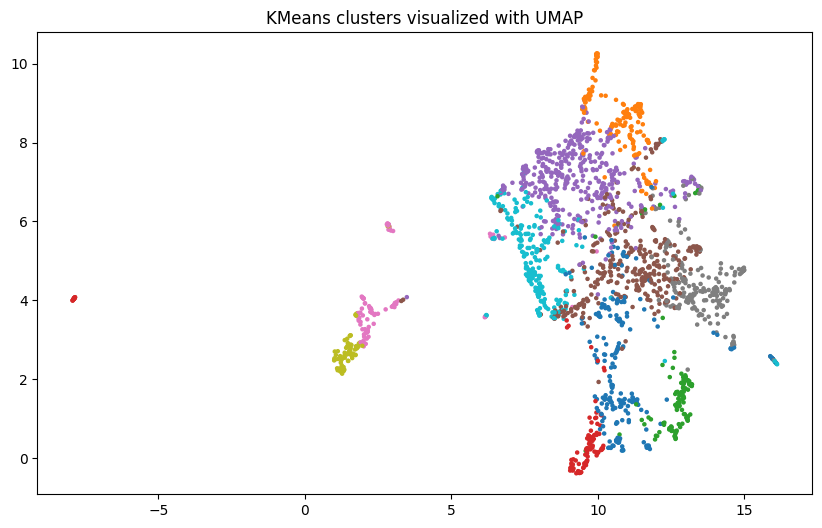

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import hdbscan
import umap
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 1️⃣ Выбор подмножества для теста
# -----------------------------
sample_size = 2000
X_sample = X_w2v[:sample_size]  # можно сменить на X_ft или X_tfidf

# -----------------------------
# 2️⃣ Функция для оценки и вывода метрик
# -----------------------------
def evaluate_clusters(X, labels, name):
    if len(set(labels)) <= 1:  # Если все точки в одном кластере
        print(f"{name}: только один кластер")
        return
    sil = silhouette_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    db = davies_bouldin_score(X, labels)
    print(f"{name} → k={len(set(labels))}, Silhouette: {sil:.3f}, Calinski-Harabasz: {ch:.1f}, Davies-Bouldin: {db:.3f}")

# -----------------------------
# 3️⃣ Центроидные методы
# -----------------------------
k = 10  # пример
km = KMeans(n_clusters=k, random_state=42).fit(X_sample)
evaluate_clusters(X_sample, km.labels_, "KMeans")

mbkm = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=256).fit(X_sample)
evaluate_clusters(X_sample, mbkm.labels_, "MiniBatchKMeans")

# -----------------------------
# 4️⃣ Иерархические
# -----------------------------
agg = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(X_sample)
evaluate_clusters(X_sample, agg.labels_, "Agglomerative Ward")

agg_avg = AgglomerativeClustering(n_clusters=k, linkage='average', metric='cosine').fit(X_sample)
evaluate_clusters(X_sample, agg_avg.labels_, "Agglomerative Average")

# -----------------------------
# 5️⃣ Плотностные
# -----------------------------
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X_sample)
evaluate_clusters(X_sample, dbscan.labels_, "DBSCAN")

hdb = hdbscan.HDBSCAN(min_cluster_size=10).fit(X_sample)
evaluate_clusters(X_sample, hdb.labels_, "HDBSCAN")

# -----------------------------
# 6️⃣ Вероятностные
# -----------------------------
gmm = GaussianMixture(n_components=k, random_state=42).fit(X_sample)
gmm_labels = gmm.predict(X_sample)
evaluate_clusters(X_sample, gmm_labels, "GMM")

# -----------------------------
# 7️⃣ Графовые
# -----------------------------
sc = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42).fit(X_sample)
evaluate_clusters(X_sample, sc.labels_, "SpectralClustering")

# -----------------------------
# 8️⃣ Визуализация UMAP
# -----------------------------
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_2d = reducer.fit_transform(X_sample)

plt.figure(figsize=(10,6))
plt.scatter(X_2d[:,0], X_2d[:,1], c=km.labels_, cmap='tab10', s=5)
plt.title("KMeans clusters visualized with UMAP")
plt.show()


In [ ]:
%%writefile clustering2.py
import numpy as np
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN, SpectralClustering
from sklearn.mixture import GaussianMixture
from hdbscan import HDBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.sparse import issparse
from tqdm import tqdm

def evaluate_clusters(X, labels, name, sample_size=500):
    n_clusters = len(set(labels))
    if n_clusters < 2:
        print(f"{name} → слишком мало кластеров для метрик")
        return
    # Если X разреженная, берем подвыборку для метрик
    if issparse(X):
        X_sample = X[:sample_size].toarray()
        labels_sample = labels[:sample_size]
    else:
        X_sample = X
        labels_sample = labels
    sil = silhouette_score(X_sample, labels_sample)
    ch = calinski_harabasz_score(X_sample, labels_sample)
    db = davies_bouldin_score(X_sample, labels_sample)
    print(f"{name} → k={n_clusters}, Silhouette: {sil:.3f}, Calinski-Harabasz: {ch:.1f}, Davies-Bouldin: {db:.3f}")

def run_all_clusters(X, k=10):
    # ------------------ Sparse-friendly ------------------
    if issparse(X):
        print("Sparse matrix detected → запускаем только KMeans / MiniBatchKMeans")
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
        evaluate_clusters(X, kmeans.labels_, "KMeans")

        mbk = MiniBatchKMeans(n_clusters=k, random_state=42).fit(X)
        evaluate_clusters(X, mbk.labels_, "MiniBatchKMeans")
        return

    # ------------------ Dense ------------------
    print("Dense matrix detected → запускаем все алгоритмы")

    # Убираем нулевые векторы (важно для GloVe)
    nonzero_mask = ~(X == 0).all(axis=1)
    X_dense = X[nonzero_mask]

    # Если после фильтрации нет векторов, просто выходим
    if X_dense.shape[0] == 0:
        print("Все векторы нулевые → пропускаем кластеризацию")
        return

    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_dense)
    evaluate_clusters(X_dense, kmeans.labels_, "KMeans")

    # MiniBatchKMeans
    mbk = MiniBatchKMeans(n_clusters=k, random_state=42).fit(X_dense)
    evaluate_clusters(X_dense, mbk.labels_, "MiniBatchKMeans")

    # Agglomerative
    agg_ward = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(X_dense)
    evaluate_clusters(X_dense, agg_ward.labels_, "Agglomerative Ward")

    agg_avg = AgglomerativeClustering(n_clusters=k, linkage='average', metric='cosine').fit(X_dense)
    evaluate_clusters(X_dense, agg_avg.labels_, "Agglomerative Average")

    # DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5, metric='cosine').fit(X_dense)
    evaluate_clusters(X_dense, dbscan.labels_, "DBSCAN")

    # HDBSCAN
    hdb = HDBSCAN(min_cluster_size=10, metric='euclidean').fit(X_dense)
    evaluate_clusters(X_dense, hdb.labels_, "HDBSCAN")

    # Gaussian Mixture
    gmm = GaussianMixture(n_components=k, random_state=42).fit(X_dense)
    labels_gmm = gmm.predict(X_dense)
    evaluate_clusters(X_dense, labels_gmm, "GMM")

    # Spectral Clustering
    spectral = SpectralClustering(n_clusters=k, affinity='nearest_neighbors', random_state=42).fit(X_dense)
    evaluate_clusters(X_dense, spectral.labels_, "SpectralClustering")


Writing clustering2.py


In [ ]:
from clustering2 import run_all_clusters

# Для TF-IDF (sparse)
run_all_clusters(X_tfidf, k=10)

# Для Word2Vec / FastText / GloVe (dense)
run_all_clusters(X_w2v, k=10)
run_all_clusters(X_ft, k=10)
run_all_clusters(X_glove, k=10)


Sparse matrix detected → запускаем только KMeans / MiniBatchKMeans
KMeans → k=10, Silhouette: 0.013, Calinski-Harabasz: 3.1, Davies-Bouldin: 6.547
MiniBatchKMeans → k=10, Silhouette: 0.009, Calinski-Harabasz: 2.7, Davies-Bouldin: 6.602
Dense matrix detected → запускаем все алгоритмы
KMeans → k=10, Silhouette: 0.104, Calinski-Harabasz: 1126.0, Davies-Bouldin: 2.108
MiniBatchKMeans → k=10, Silhouette: 0.092, Calinski-Harabasz: 1076.3, Davies-Bouldin: 2.309
Agglomerative Ward → k=10, Silhouette: 0.084, Calinski-Harabasz: 926.2, Davies-Bouldin: 2.212
Agglomerative Average → k=10, Silhouette: 0.059, Calinski-Harabasz: 286.2, Davies-Bouldin: 1.493
DBSCAN → слишком мало кластеров для метрик


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN → k=15, Silhouette: -0.124, Calinski-Harabasz: 110.0, Davies-Bouldin: 2.198
GMM → k=10, Silhouette: 0.085, Calinski-Harabasz: 1017.3, Davies-Bouldin: 2.260
SpectralClustering → k=10, Silhouette: 0.030, Calinski-Harabasz: 294.8, Davies-Bouldin: 1.375
Dense matrix detected → запускаем все алгоритмы
KMeans → k=10, Silhouette: 0.122, Calinski-Harabasz: 1157.9, Davies-Bouldin: 1.978
MiniBatchKMeans → k=10, Silhouette: 0.103, Calinski-Harabasz: 1029.4, Davies-Bouldin: 2.258
Agglomerative Ward → k=10, Silhouette: 0.089, Calinski-Harabasz: 967.0, Davies-Bouldin: 2.124
Agglomerative Average → k=10, Silhouette: 0.064, Calinski-Harabasz: 407.1, Davies-Bouldin: 1.412
DBSCAN → слишком мало кластеров для метрик


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN → k=3, Silhouette: 0.027, Calinski-Harabasz: 278.2, Davies-Bouldin: 5.884
GMM → k=10, Silhouette: 0.096, Calinski-Harabasz: 1036.4, Davies-Bouldin: 2.187
SpectralClustering → k=10, Silhouette: 0.046, Calinski-Harabasz: 387.4, Davies-Bouldin: 1.587
Dense matrix detected → запускаем все алгоритмы
KMeans → k=10, Silhouette: 0.074, Calinski-Harabasz: 1244.4, Davies-Bouldin: 2.561
MiniBatchKMeans → k=10, Silhouette: 0.073, Calinski-Harabasz: 1177.9, Davies-Bouldin: 2.933
Agglomerative Ward → k=10, Silhouette: -0.015, Calinski-Harabasz: 990.7, Davies-Bouldin: 2.888
Agglomerative Average → k=10, Silhouette: 0.568, Calinski-Harabasz: 217.0, Davies-Bouldin: 1.431
DBSCAN → слишком мало кластеров для метрик


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN → k=4, Silhouette: 0.482, Calinski-Harabasz: 1308.5, Davies-Bouldin: 1.430
GMM → k=10, Silhouette: 0.011, Calinski-Harabasz: 648.8, Davies-Bouldin: 5.669
SpectralClustering → k=10, Silhouette: 0.069, Calinski-Harabasz: 666.1, Davies-Bouldin: 1.681


cluster
1    2471
0    2213
5    2207
6    2073
2    1478
9    1232
4    1185
3     948
8     893
7     300
Name: count, dtype: int64


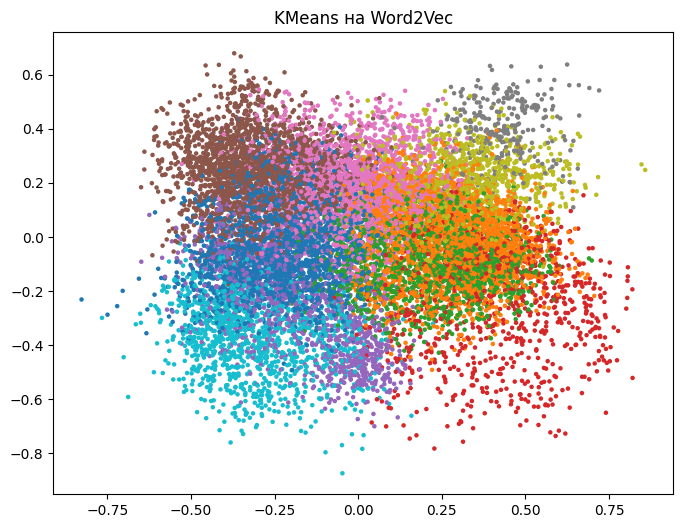

In [ ]:
from clustering2 import run_all_clusters
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Пример: KMeans на плотной матрице
from sklearn.cluster import KMeans

k = 10
kmeans = KMeans(n_clusters=k, random_state=42).fit(X_w2v)
labels = kmeans.labels_

# Сохраняем в DataFrame
df_clusters = pd.DataFrame({'doc_id': range(len(labels)), 'cluster': labels})
print(df_clusters['cluster'].value_counts())

# Визуализируем через PCA
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_w2v)
plt.figure(figsize=(8,6))
plt.scatter(X_vis[:,0], X_vis[:,1], c=labels, cmap='tab10', s=5)
plt.title("KMeans на Word2Vec")
plt.show()



### **3.4. Оценка качества**
- **Внутренние метрики**: Silhouette, Calinski-Harabasz, Davies-Bouldin  
- **Внешние метрики** (если есть тематическая разметка из ЛР №3): ARI, NMI, V-measure  
- Постройте графики зависимости метрик от параметров


Внутренние метрики

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.sparse import issparse

def plot_internal_metrics(X, k_range, title=""):
    sil_scores, ch_scores, db_scores = [], [], []

    # При разреженной матрице берём подвыборку (метрики требуют dense)
    if issparse(X):
        X_eval = X[:1500].toarray()
    else:
        X_eval = X

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X_eval)
        labels = kmeans.labels_
        sil_scores.append(silhouette_score(X_eval, labels))
        ch_scores.append(calinski_harabasz_score(X_eval, labels))
        db_scores.append(davies_bouldin_score(X_eval, labels))

    plt.figure(figsize=(15,4))

    plt.subplot(1,3,1)
    plt.plot(k_range, sil_scores, marker='o')
    plt.title(f"Silhouette ({title})")

    plt.subplot(1,3,2)
    plt.plot(k_range, ch_scores, marker='o')
    plt.title(f"Calinski–Harabasz ({title})")

    plt.subplot(1,3,3)
    plt.plot(k_range, db_scores, marker='o')
    plt.title(f"Davies–Bouldin ({title})")

    plt.show()


📌 TF-IDF (разреженная)

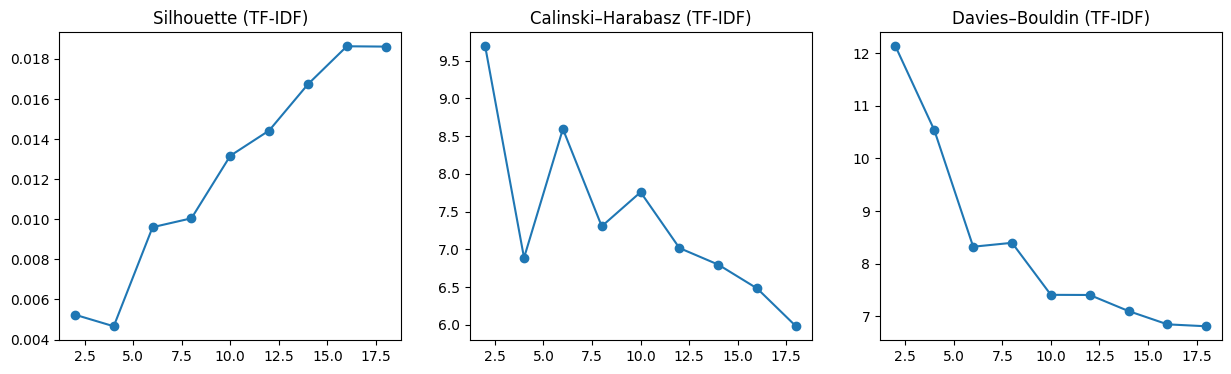

In [ ]:
plot_internal_metrics(X_tfidf, k_range=range(2, 20, 2), title="TF-IDF")


📌 Word2Vec

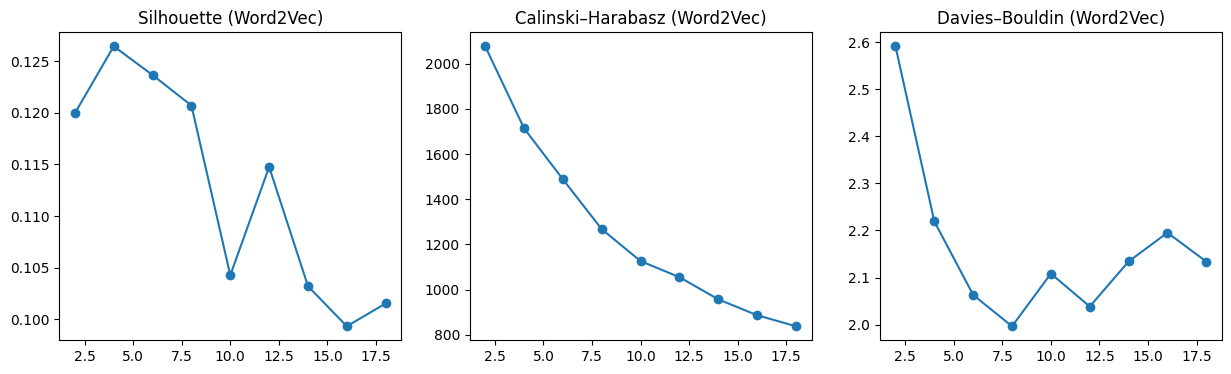

In [ ]:
plot_internal_metrics(X_w2v, k_range=range(2, 20, 2), title="Word2Vec")


📌 FastText

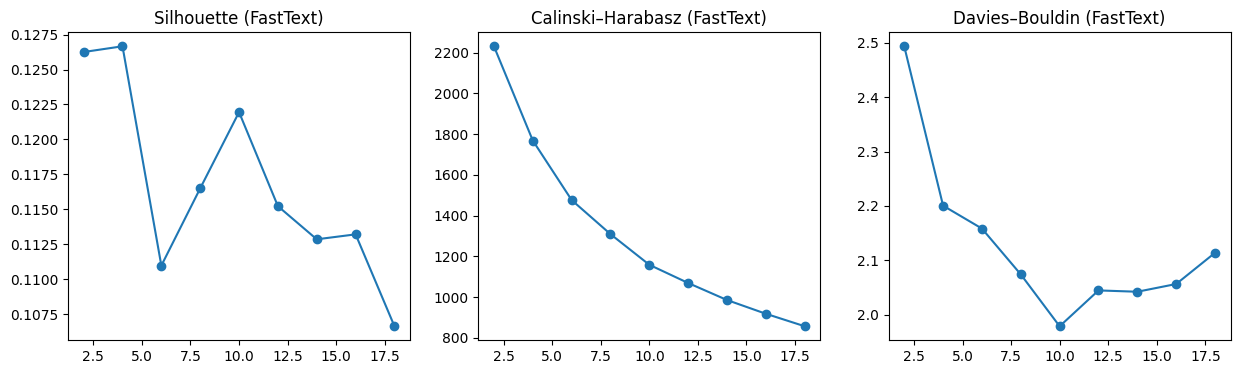

In [ ]:
plot_internal_metrics(X_ft, k_range=range(2, 20, 2), title="FastText")


📌 GloVe

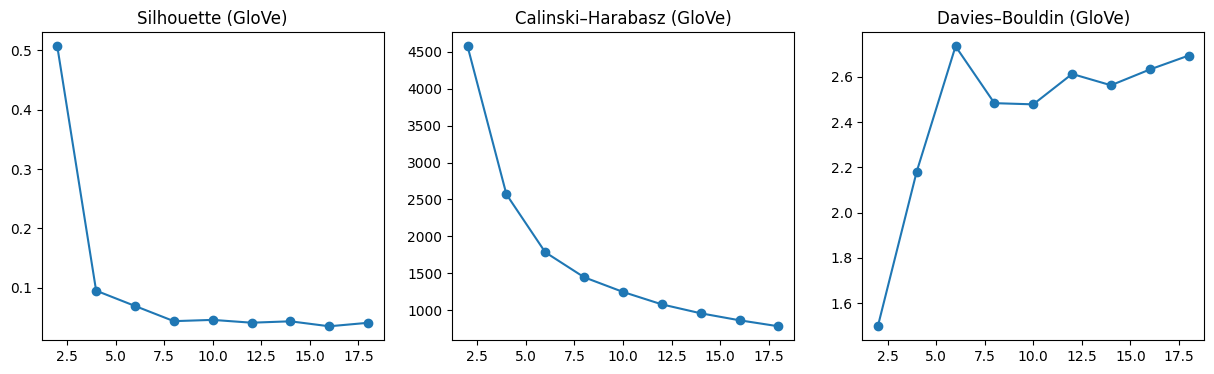

In [ ]:
plot_internal_metrics(X_glove, k_range=range(2, 20, 2), title="GloVe")


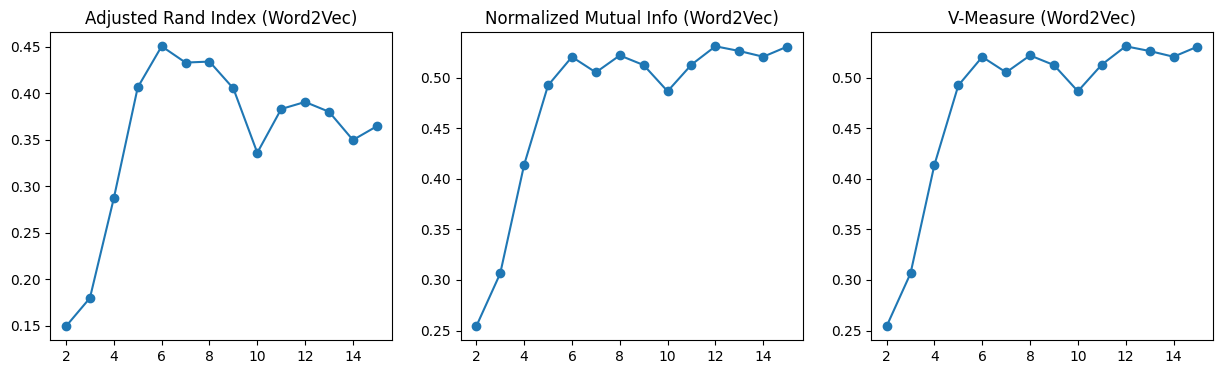

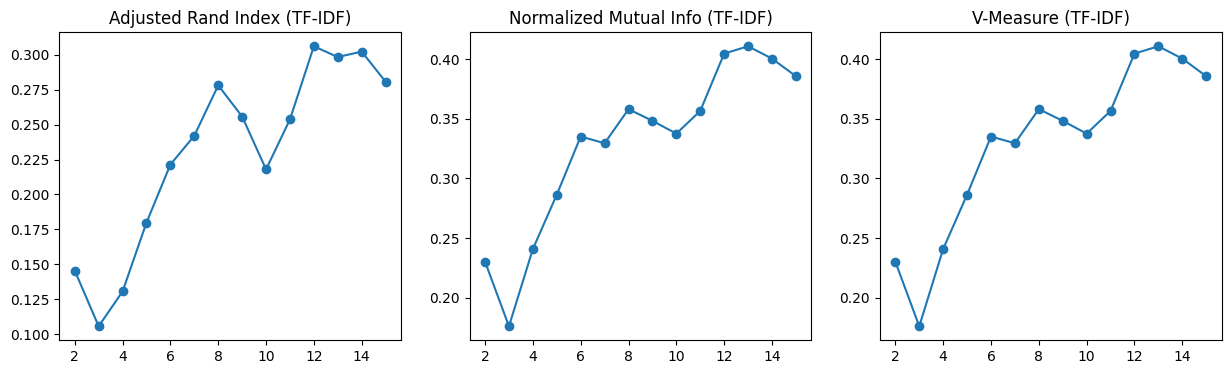

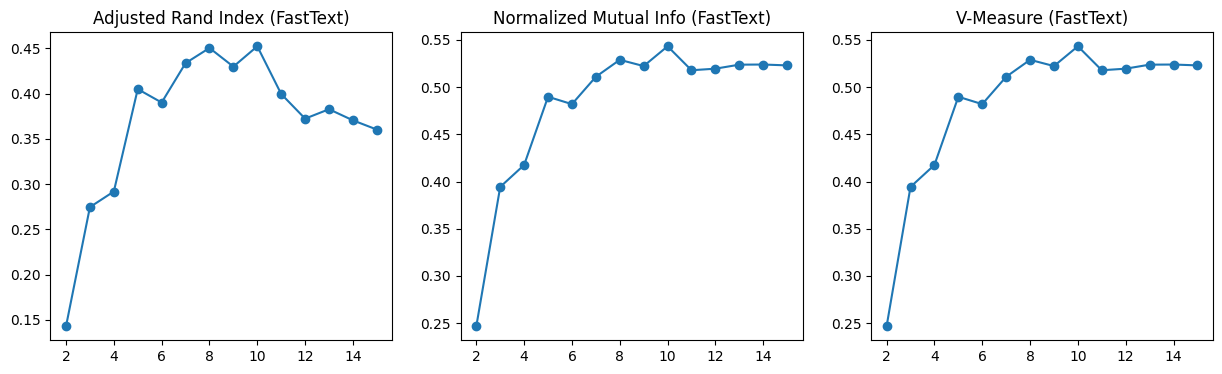

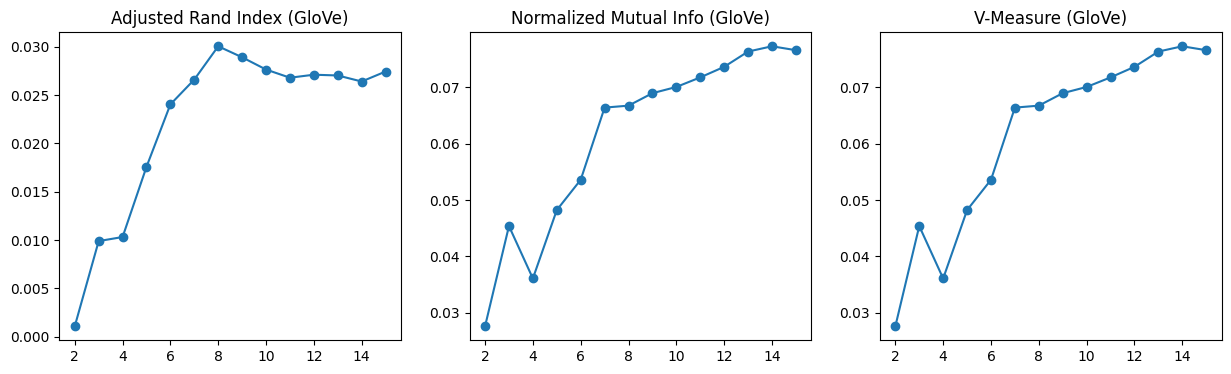

In [ ]:
# ------------------------------
# 1️⃣ Установки (если нужно)
# ------------------------------
!pip install gensim matplotlib --quiet

# ------------------------------
# 2️⃣ Импорты
# ------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, v_measure_score
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

# ------------------------------
# 3️⃣ Генерация псевдо-меток LDA
# ------------------------------
# tokenized_docs = [doc.split() for doc in preprocessed_texts]  # должен быть у тебя
num_topics = 10  # количество «тем» для псевдо-разметки
dictionary = Dictionary(tokenized_docs)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,
               passes=5, random_state=42)

# Получаем доминирующую тему для каждого документа
lda_labels = []
for bow in corpus:
    if len(bow) == 0:
        lda_labels.append(-1)  # пустой документ
    else:
        probs = lda.get_document_topics(bow)
        top = max(probs, key=lambda x: x[1])
        lda_labels.append(top[0])
lda_labels = np.array(lda_labels)
# Исключаем пустые документы
mask = lda_labels != -1
y_true = lda_labels[mask]

# ------------------------------
# 4️⃣ Функция расчёта внешних метрик и построения графиков
# ------------------------------
def plot_external_metrics(X, y_true, k_range, title=""):
    ari_scores, nmi_scores, v_scores = [], [], []

    # Если матрица разреженная, возьмём подвыборку для скорости
    from scipy.sparse import issparse
    if issparse(X):
        X_eval = X[:1500].toarray()
        y_eval = y_true[:1500]
    else:
        X_eval = X
        y_eval = y_true

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42).fit(X_eval)
        labels_pred = kmeans.labels_

        ari_scores.append(adjusted_rand_score(y_eval, labels_pred))
        nmi_scores.append(normalized_mutual_info_score(y_eval, labels_pred))
        v_scores.append(v_measure_score(y_eval, labels_pred))

    # Построим графики
    plt.figure(figsize=(15,4))

    plt.subplot(1,3,1)
    plt.plot(k_range, ari_scores, marker='o')
    plt.title(f"Adjusted Rand Index ({title})")

    plt.subplot(1,3,2)
    plt.plot(k_range, nmi_scores, marker='o')
    plt.title(f"Normalized Mutual Info ({title})")

    plt.subplot(1,3,3)
    plt.plot(k_range, v_scores, marker='o')
    plt.title(f"V-Measure ({title})")

    plt.show()

# ------------------------------
# 5️⃣ Запуск для твоих данных
# ------------------------------
k_range = range(2, 16)

# Пример: Word2Vec матрица
plot_external_metrics(X_w2v, y_true, k_range, title="Word2Vec")

# Можно повторить для X_tfidf, X_ft, X_glove
plot_external_metrics(X_tfidf, y_true, k_range, title="TF-IDF")
plot_external_metrics(X_ft, y_true, k_range, title="FastText")
plot_external_metrics(X_glove, y_true, k_range, title="GloVe")


### **3.5. Интерпретация**
- Для TF-IDF: топ-10 слов на кластер  
- Для эмбеддингов: ближайшие слова к центроиду (через `model.most_similar()`)  
- Визуализация: UMAP → 2D scatter plot с цветами кластеров

> 📌 **LIME и SHAP** могут применяться **только если кластеризация используется как признак в downstream-задаче** (например, кластер → признак для классификатора). В чистой кластеризации они **не применимы напрямую**, но могут использоваться для анализа косвенных эффектов.


TF-IDF: топ-10 слов на кластер
Cluster 0: регион, губернатор, область, воробьёв, на, он, выборы, андрей, год, по
Cluster 1: она, что, на, он, не, женщина, они, ребёнок, из, девушка
Cluster 2: самолёт, сирия, истребитель, военный, ракета, российский, на, сирийский, россия, су
Cluster 3: на, год, что, он, по, быть, который, это, не, из
Cluster 4: процент, на, рубль, цена, год, по, рынок, за, рост, доллар
Cluster 5: по, дело, он, на, суд, уголовный, кокорин, год, быть, что
Cluster 6: что, сша, президент, он, на, россия, трамп, не, по, страна
Cluster 7: матч, команда, клуб, он, чемпионат, сборная, чемпион, бой, на, лига
Cluster 8: на, он, из, что, произойти, человек, по, мужчина, пострадать, не
Cluster 9: украина, украинский, церковь, военный, на, россия, киев, порошенко, что, корабль


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


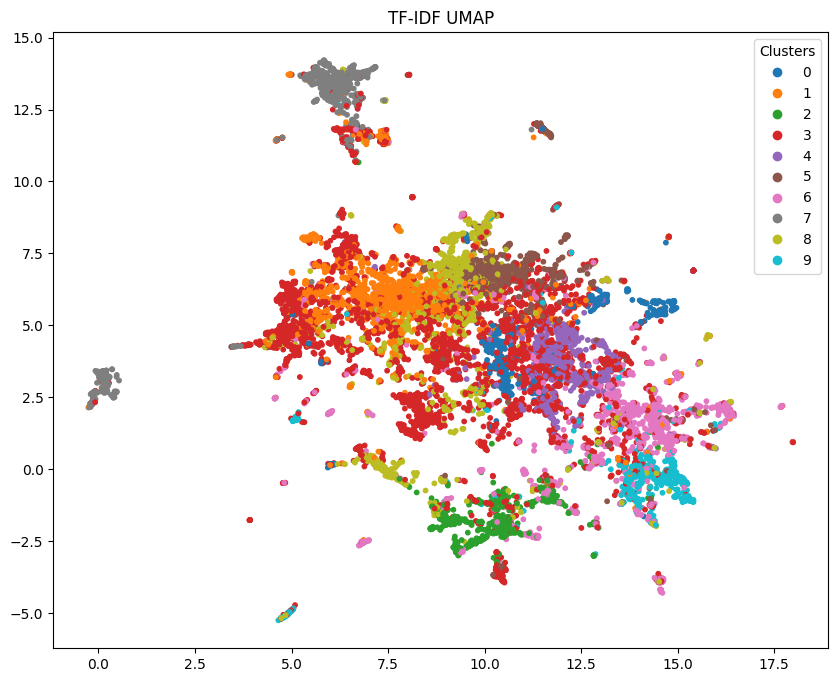


Эмбеддинги: ближайшие слова к центроиду
Cluster 0: созреть, демченко, руководимый, аккумуляция, гипотетически, докапитализация, обновиться, смолия, представимый, обезболивание
Cluster 1: малолетка, одуматься, образцовый, нечистоплотный, неэтичный, огорчить, халсема, минобразования, руководимый, жалость
Cluster 2: ибрагимов, урбански, врываться, мелить, автоинспекция, замышлять, шалость, эксгумировать, беспечность, дискотека
Cluster 3: градоначальница, шер, бранный, наградной, княжеский, теленовость, порноконтент, изюминка, микетти, постмодернизм
Cluster 4: раскрытый, слом, кибероружие, сдвинуть, задействоваться, atak, газифицировать, скрытность, рассеять, пронизать
Cluster 5: демченко, пдпча, авантюра, деоккупация, созреть, рябкова, грибаускать, поручать, раскрытый, аналогично
Cluster 6: борцвадзе, курбединов, курбедин, лукичев, чистовый, гнипель, маджид, токмади, лейнганг, винник
Cluster 7: павлович, одерживать, реслинг, оверить, несостоявшийся, взбесить, майрбек, участь, тенсином, м

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


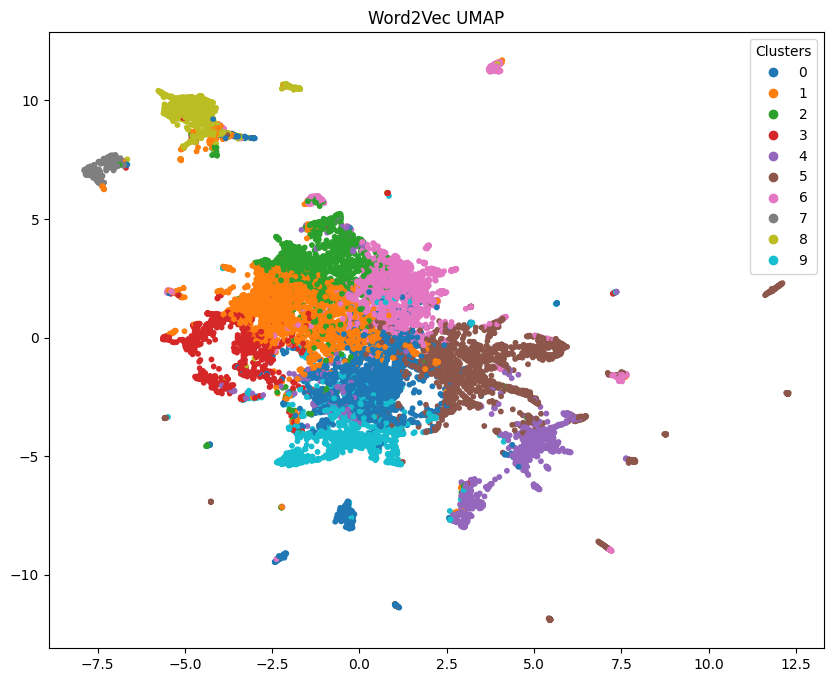


Эмбеддинги: ближайшие слова к центроиду
Cluster 0: wg, ппш, тамразян, жж, бмсэ, ттк, нiв, fpö, тэя, sdf
Cluster 1: лсд, cp, nhej, sd, жнвлп, iq, ccr, nyt, бмсэ, wg
Cluster 2: тд, жнвлп, mdb, ттк, цкпд, gdpr, imdb, фпу, iq, wg
Cluster 3: jr, vtb, wg, psychonautwiki, tdd, mwa, iowa, imdb, zewa, db
Cluster 4: sbg, тьфу, вфв, dhl, гюнеш, wg, кдк, тянькай, уорриорз, вэйд
Cluster 5: sdf, mhev, wg, бмсэ, нiв, рсд, ssc, sr, dhl, тд
Cluster 6: wg, gdpr, нiв, sdf, цкпд, быдгощ, чнхп, fpö, тд, dhl
Cluster 7: жж, wg, iq, ппш, быдгощ, нiв, лсд, ттк, vtb, dd
Cluster 8: нiв, wg, gdpr, гкчп, нвф, пдпча, sdf, птср, гбу, тамразян
Cluster 9: sbg, нсдап, уайтхэда, тьфу, йенджейчик, уорриорз, вэйд, тянькай, бешикташ, вфв


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


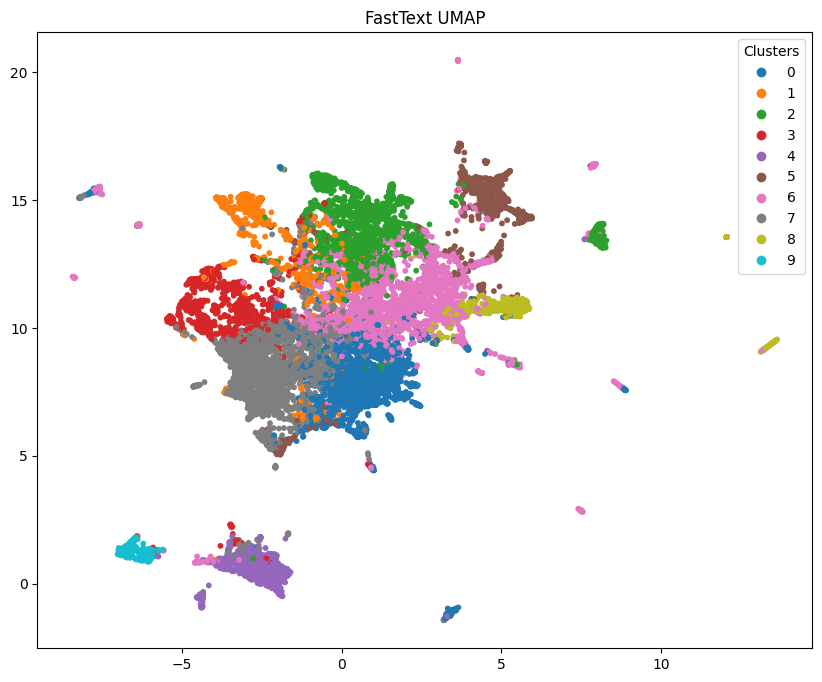


Эмбеддинги: ближайшие слова к центроиду
Cluster 0: не удалось найти слова
Cluster 1: не удалось найти слова
Cluster 2: не удалось найти слова
Cluster 3: не удалось найти слова
Cluster 4: не удалось найти слова
Cluster 5: не удалось найти слова
Cluster 6: не удалось найти слова
Cluster 7: не удалось найти слова
Cluster 8: не удалось найти слова
Cluster 9: не удалось найти слова


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


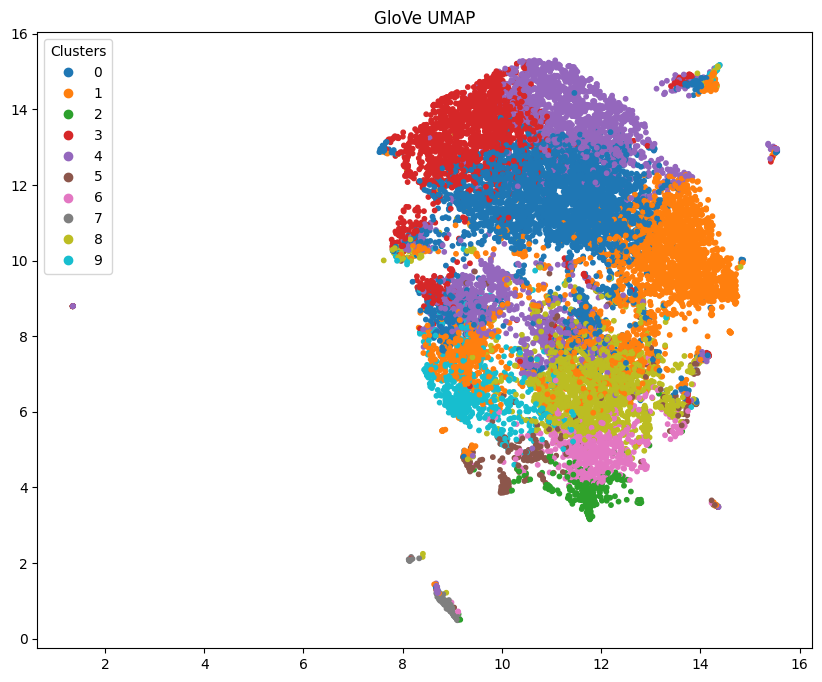

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec, FastText
import umap

# -----------------------------
# 1️⃣ TF-IDF: топ-10 слов на кластер
# -----------------------------
def tfidf_top_words(X_tfidf, vectorizer, k=10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_tfidf)
    labels = kmeans.labels_
    feature_names = np.array(vectorizer.get_feature_names_out())

    print("TF-IDF: топ-10 слов на кластер")
    for cluster in range(k):
        # средний вес слов в кластере
        cluster_center = kmeans.cluster_centers_[cluster]
        top_idx = cluster_center.argsort()[-10:][::-1]
        top_words = feature_names[top_idx]
        print(f"Cluster {cluster}: {', '.join(top_words)}")
    return labels

# -----------------------------
# 2️⃣ Эмбеддинги: ближайшие слова к центроиду
# -----------------------------
def embeddings_top_words(model, X_emb, k=10, topn=10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_emb)
    labels = kmeans.labels_

    print("\nЭмбеддинги: ближайшие слова к центроиду")
    for cluster in range(k):
        centroid = kmeans.cluster_centers_[cluster]
        # most_similar может принимать вектор через положительный список
        try:
            similar = model.wv.similar_by_vector(centroid, topn=topn)
            words = [w for w,_ in similar]
            print(f"Cluster {cluster}: {', '.join(words)}")
        except:
            print(f"Cluster {cluster}: не удалось найти слова")
    return labels

# -----------------------------
# 3️⃣ UMAP: визуализация 2D scatter
# -----------------------------
def plot_umap(X, labels, title="UMAP 2D Visualization"):
    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
    X_2d = reducer.fit_transform(X)

    plt.figure(figsize=(10,8))
    scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=labels, cmap='tab10', s=10)
    plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.title(title)
    plt.show()

# -----------------------------
# Пример использования
# -----------------------------
# TF-IDF
tfidf_labels = tfidf_top_words(X_tfidf, tfidf_vectorizer, k=10)
plot_umap(X_tfidf.toarray(), tfidf_labels, title="TF-IDF UMAP")

# Word2Vec
w2v_labels = embeddings_top_words(w2v_model, X_w2v, k=10)
plot_umap(X_w2v, w2v_labels, title="Word2Vec UMAP")

# FastText
ft_labels = embeddings_top_words(ft_model, X_ft, k=10)
plot_umap(X_ft, ft_labels, title="FastText UMAP")

# GloVe
glove_labels = embeddings_top_words(glove_model, X_glove, k=10)
plot_umap(X_glove, glove_labels, title="GloVe UMAP")



### **3.6. AutoML для кластеризации?**
> ❗ **Важно**: **AutoML-фреймворки (Auto-sklearn, TPOT, H2O)** **не поддерживают задачи без учителя** (включая кластеризацию) в стандартной конфигурации.  
> Auto-sklearn поддерживает **только задачи с разметкой** (классификация, регрессия).  
> Следовательно, **AutoML в данной работе НЕ ИСПОЛЬЗУЕТСЯ**.

AutoML не использовался, так как для кластеризации подходит только unsupervised подход, а AutoML рассчитан на supervised задачи.

### **3.7. Веб-интерфейс**
- Используйте `Streamlit` или `Gradio` для:
  - выбора метода токенизации/векторизации/алгоритма,  
  - визуализации кластеров,  
  - просмотра содержимого кластеров.


In [ ]:
!pip install -q streamlit pyngrok
print("✅ Streamlit и pyngrok установлены!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 40.8 MB/s eta 0:00:00
✅ Streamlit и pyngrok установлены!


In [45]:
import numpy as np
import pickle
from scipy.sparse import save_npz

# TF-IDF (разреженная матрица)
save_npz("X_tfidf.npz", X_tfidf)

# Word2Vec / FastText / GloVe (dense)
np.save("X_w2v.npy", X_w2v)
np.save("X_ft.npy", X_ft)
np.save("X_glove.npy", X_glove)

# Токенизированные документы
with open("tokenized_docs.pkl", "wb") as f:
    pickle.dump(tokenized_docs, f)

# Исходные тексты
with open("texts.pkl", "wb") as f:
    pickle.dump(texts, f)


In [46]:
!ls -lh


total 641M
-rw-r--r-- 1 root root 5.2K Nov 16 09:23 app4.py
-rw-r--r-- 1 root root 406K Nov 16 07:06 bpe.model
-rw-r--r-- 1 root root 155K Nov 16 07:06 bpe.vocab
-rw-r--r-- 1 root root 3.4K Nov 16 07:29 clustering2.py
-rw-r--r-- 1 root root  31M Nov 16 07:05 corpus_preprocessed.txt
-rw-r--r-- 1 root root 503M Dec  8  2021 lenta-ru-news.csv.gz
drwxr-xr-x 2 root root 4.0K Nov 16 07:29 __pycache__
drwxr-xr-x 1 root root 4.0K Nov 12 14:30 sample_data
-rw-r--r-- 1 root root  426 Nov 16 07:11 text_preprocessing.py
-rw-r--r-- 1 root root  35M Nov 16 09:24 texts.pkl
-rw-r--r-- 1 root root 1.9K Nov 16 07:18 text_to_vector.py
-rw-r--r-- 1 root root  36M Nov 16 09:24 tokenized_docs.pkl
-rw-r--r-- 1 root root 5.8M Nov 16 09:24 X_ft.npy
-rw-r--r-- 1 root root  12M Nov 16 09:24 X_glove.npy
-rw-r--r-- 1 root root  14M Nov 16 09:24 X_tfidf.npz
-rw-r--r-- 1 root root 5.8M Nov 16 09:24 X_w2v.npy


In [47]:
"""%%writefile app4.py
import os
import streamlit as st
import numpy as np
import pickle
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.sparse import issparse, load_npz

st.set_page_config(layout="wide")
st.title("🔍 Кластеризация текстов Lenta.ru")

# ========================================
# 🔹 Загрузка данных
# ========================================
@st.cache_data
def load_data():
    try:
        # TF-IDF: ищем .npz или .npy
        if os.path.exists("X_tfidf.npz"):
            X_tfidf = load_npz("X_tfidf.npz")
        elif os.path.exists("X_tfidf.npy"):
            X_tfidf = np.load("X_tfidf.npy")
        else:
            st.warning("❌ Файл X_tfidf не найден!")
            X_tfidf = None

        # Другие матрицы
        X_w2v = np.load("X_w2v.npy") if os.path.exists("X_w2v.npy") else None
        X_ft = np.load("X_ft.npy") if os.path.exists("X_ft.npy") else None
        X_glove = np.load("X_glove.npy") if os.path.exists("X_glove.npy") else None

        # Токены и тексты
        with open("tokenized_docs.pkl", "rb") as f:
            tokenized_docs = pickle.load(f)
        with open("texts.pkl", "rb") as f:
            texts = pickle.load(f)

        st.sidebar.success("✅ Данные загружены!")
        st.sidebar.write(f"- TF-IDF: {None if X_tfidf is None else X_tfidf.shape}")
        st.sidebar.write(f"- Word2Vec: {X_w2v.shape if X_w2v is not None else None}")
        st.sidebar.write(f"- FastText: {X_ft.shape if X_ft is not None else None}")
        st.sidebar.write(f"- GloVe: {X_glove.shape if X_glove is not None else None}")
        st.sidebar.write(f"- Документов: {len(texts)}")

        X_dict = {"TF-IDF": X_tfidf, "Word2Vec": X_w2v, "FastText": X_ft, "GloVe": X_glove}
        return X_dict, tokenized_docs, texts

    except Exception as e:
        st.error(f"❌ Ошибка при загрузке данных: {e}")
        return None, None, None

# Загружаем данные
X_options, tokenized_docs, texts = load_data()
if X_options is None:
    st.stop()

# ========================================
# 🔹 Интерфейс
# ========================================
st.sidebar.header("⚙️ Настройки")
X_name = st.sidebar.selectbox("Метод векторизации", [k for k,v in X_options.items() if v is not None])
n_clusters = st.sidebar.slider("Количество кластеров", 2, 20, 10)

if st.sidebar.button("▶️ Выполнить кластеризацию"):
    X = X_options[X_name]

    if X is None or len(X) == 0:
        st.error(f"❌ Матрица {X_name} пустая!")
        st.stop()

    # Кластеризация KMeans
    with st.spinner("⏳ Кластеризация..."):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(X)
        labels = kmeans.labels_

    st.success(f"✅ Кластеризация завершена! Метод: {X_name}, кластеров: {n_clusters}")

    # Сохраняем в session_state
    st.session_state['labels'] = labels
    st.session_state['X'] = X
    st.session_state['X_name'] = X_name
    st.session_state['n_clusters'] = n_clusters

# ========================================
# 🔹 Просмотр примеров документов
# ========================================
if 'labels' in st.session_state:
    labels = st.session_state['labels']
    X = st.session_state['X']
    X_name = st.session_state['X_name']
    n_clusters = st.session_state['n_clusters']

    st.subheader(f"📄 Примеры документов по кластерам ({X_name})")
    cluster_id = st.number_input("Выберите кластер", 0, n_clusters-1, 0)

    cluster_indices = [i for i, label in enumerate(labels) if label == cluster_id]
    if len(cluster_indices) == 0:
        st.warning(f"⚠️ Кластер {cluster_id} пустой!")
    else:
        examples = [texts[i][:300] + "..." for i in cluster_indices[:10]]
        st.write(f"**Кластер {cluster_id}** (всего документов: {len(cluster_indices)})")
        for i, ex in enumerate(examples, 1):
            st.write(f"{i}. {ex}")

    # ========================================
    # 🔹 Визуализация PCA
    # ========================================
    st.subheader(f"📊 Визуализация кластеров (PCA 2D)")
    with st.spinner("⏳ Построение графика..."):
        pca = PCA(n_components=2, random_state=42)
        X_dense = X.toarray() if issparse(X) else X
        X_2d = pca.fit_transform(X_dense)

        fig, ax = plt.subplots(figsize=(10, 6))
        scatter = ax.scatter(X_2d[:,0], X_2d[:,1], c=labels, cmap='tab10', s=20, alpha=0.7)
        ax.set_title(f"Кластеры методом {X_name} (k={n_clusters})")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        plt.colorbar(scatter, ax=ax, label="Кластер")
        st.pyplot(fig)

else:
    st.info("👈 Выберите параметры в боковой панели и нажмите '▶️ Выполнить кластеризацию'")


Overwriting app4.py


In [1]:
%%writefile app4.py
import os
import streamlit as st
import numpy as np
import pickle
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.sparse import issparse, load_npz

st.set_page_config(layout="wide")
st.title("🔍 Кластеризация текстов Lenta.ru")

# ========================================
# 🔹 Загрузка данных
# ========================================
@st.cache_data
def load_data():
    try:
        # TF-IDF: ищем .npz или .npy
        if os.path.exists("X_tfidf.npz"):
            X_tfidf = load_npz("X_tfidf.npz")
        elif os.path.exists("X_tfidf.npy"):
            X_tfidf = np.load("X_tfidf.npy")
        else:
            st.warning("❌ Файл X_tfidf не найден!")
            X_tfidf = None

        # Другие матрицы
        X_w2v = np.load("X_w2v.npy") if os.path.exists("X_w2v.npy") else None
        X_ft = np.load("X_ft.npy") if os.path.exists("X_ft.npy") else None
        X_glove = np.load("X_glove.npy") if os.path.exists("X_glove.npy") else None

        # Токены и тексты
        if os.path.exists("tokenized_docs.pkl"):
            with open("tokenized_docs.pkl", "rb") as f:
                tokenized_docs = pickle.load(f)
        else:
            st.warning("❌ Файл tokenized_docs.pkl не найден!")
            tokenized_docs = None

        if os.path.exists("texts.pkl"):
            with open("texts.pkl", "rb") as f:
                texts = pickle.load(f)
        else:
            st.warning("❌ Файл texts.pkl не найден!")
            texts = None

        # Проверяем размеры
        st.sidebar.success("✅ Данные загружены!")
        st.sidebar.write(f"- TF-IDF: {None if X_tfidf is None else X_tfidf.shape}")
        st.sidebar.write(f"- Word2Vec: {X_w2v.shape if X_w2v is not None else None}")
        st.sidebar.write(f"- FastText: {X_ft.shape if X_ft is not None else None}")
        st.sidebar.write(f"- GloVe: {X_glove.shape if X_glove is not None else None}")
        st.sidebar.write(f"- Документов: {len(texts) if texts is not None else None}")

        X_dict = {"TF-IDF": X_tfidf, "Word2Vec": X_w2v, "FastText": X_ft, "GloVe": X_glove}
        return X_dict, tokenized_docs, texts

    except Exception as e:
        st.error(f"❌ Ошибка при загрузке данных: {e}")
        return None, None, None

# Загружаем данные
X_options, tokenized_docs, texts = load_data()
if X_options is None or texts is None or tokenized_docs is None:
    st.stop()

# ========================================
# 🔹 Интерфейс
# ========================================
st.sidebar.header("⚙️ Настройки")
X_name = st.sidebar.selectbox("Метод векторизации", [k for k,v in X_options.items() if v is not None])
n_clusters = st.sidebar.slider("Количество кластеров", 2, 20, 10)

if st.sidebar.button("▶️ Выполнить кластеризацию"):
    X = X_options[X_name]

    # ------------------ Проверка данных ------------------
    if X is None or (issparse(X) and X.shape[0] == 0) or (not issparse(X) and len(X) == 0):
        st.error(f"❌ Матрица {X_name} пустая!")
        st.stop()

    if issparse(X):
        if np.isnan(X.data).any():
            st.error(f"❌ Матрица {X_name} содержит NaN!")
            st.stop()
    else:
        if np.isnan(X).any():
            st.error(f"❌ Матрица {X_name} содержит NaN!")
            st.stop()
    # -----------------------------------------------------

    # Кластеризация KMeans
    with st.spinner("⏳ Кластеризация..."):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(X)
        labels = kmeans.labels_

    st.success(f"✅ Кластеризация завершена! Метод: {X_name}, кластеров: {n_clusters}")

    # Сохраняем результаты в session_state
    st.session_state['labels'] = labels
    st.session_state['X'] = X
    st.session_state['X_name'] = X_name
    st.session_state['n_clusters'] = n_clusters

# ========================================
# 🔹 Просмотр примеров документов
# ========================================
if 'labels' in st.session_state:
    labels = st.session_state['labels']
    X = st.session_state['X']
    X_name = st.session_state['X_name']
    n_clusters = st.session_state['n_clusters']

    st.subheader(f"📄 Примеры документов по кластерам ({X_name})")
    cluster_id = st.number_input("Выберите кластер", 0, n_clusters-1, 0)

    cluster_indices = [i for i, label in enumerate(labels) if label == cluster_id]
    if len(cluster_indices) == 0:
        st.warning(f"⚠️ Кластер {cluster_id} пустой!")
    else:
        examples = [texts[i][:300] + "..." for i in cluster_indices[:10]]
        st.write(f"**Кластер {cluster_id}** (всего документов: {len(cluster_indices)})")
        for i, ex in enumerate(examples, 1):
            st.write(f"{i}. {ex}")

    # ========================================
    # 🔹 Визуализация PCA
    # ========================================
    st.subheader(f"📊 Визуализация кластеров (PCA 2D)")
    with st.spinner("⏳ Построение графика..."):
        pca = PCA(n_components=2, random_state=42)
        X_dense = X.toarray() if issparse(X) else X
        X_2d = pca.fit_transform(X_dense)

        fig, ax = plt.subplots(figsize=(10, 6))
        scatter = ax.scatter(X_2d[:,0], X_2d[:,1], c=labels, cmap='tab10', s=20, alpha=0.7)
        ax.set_title(f"Кластеры методом {X_name} (k={n_clusters})")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        plt.colorbar(scatter, ax=ax, label="Кластер")
        st.pyplot(fig)

else:
    st.info("👈 Выберите параметры в боковой панели и нажмите '▶️ Выполнить кластеризацию'")


Overwriting app4.py


In [2]:
!pkill -f streamlit


In [3]:
ngrok.kill()


NameError: name 'ngrok' is not defined

In [4]:
!streamlit run app4.py &>/dev/null &

from pyngrok import ngrok, conf
import time

NGROK_AUTH_TOKEN = "33rrvngq55Ym4ttNvRgvHJi6I9z_3uyg5NWWBepyuEtYCYiey"
conf.get_default().auth_token = NGROK_AUTH_TOKEN
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

public_url = ngrok.connect(addr="8501", proto="http")
print("🌐 Public URL для Streamlit:", public_url)

time.sleep(3)
print("\n✅ Streamlit запущен! Открой ссылку в браузере.")


🌐 Public URL для Streamlit: NgrokTunnel: "https://jessie-clumpy-opal.ngrok-free.dev" -> "http://localhost:8501"

✅ Streamlit запущен! Открой ссылку в браузере.
